# Ayudantía 2: Jupyter Plotting

En jupyter, existen varias maneras distintas de **plotear** nuestros datos, en esta ayudantía nos centraremos en el uso de la [librería altair](https://altair-viz.github.io/index.html). Sin embargo, también veremos un poco de [matplotlib](https://matplotlib.org/)

## 1. Matplotlib
Esta librería nos permite hacer ploteo básico de datos, los cuales pueden estar las en estructuras de datos que queramos, sin embargo, nos centraremos en datos que tengan forma de **pandas DataFrame** por simplicidad.

Para nuestros ejemplos, usaremos los datos de una librería llamada [scikit-learn](http://scikit-learn.org/stable/index.html)

Para instalar estas librerías, deben correr los comandos
```bash
pip install numpy scipy matplotlib
pip install -U scikit-learn
```

Esto también instalará librarías útiles como [numpy](http://www.numpy.org/) y [SciPy](https://www.scipy.org/) en su computador.

Empezaremos importando las librerías utilizadas

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd

Ahora cargaremos los datos del dataset **iris** de scikit-learn, el cual toma las mediciones de 150 flores, resgitrando el largo y ancho de los sépalos y los pétalos de lirios (o irises) y el típo de flor (Setosa, Virginica o Versicolor)

In [2]:
dataset = datasets.load_iris()
features = ['s_length', 's_width', 'p_length', 'p_width']
iris = pd.DataFrame(dataset['data'], columns=features)
tipo = list(map(lambda x: dataset['target_names'][x], list(dataset['target'])))
iris['tipo'] = pd.Series(tipo)
iris['tipo_num'] = pd.Series(dataset['target'])

iris

,s_length,s_width,p_length,p_width,tipo,tipo_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


Ahora que disponemos de datos, podemos plotearlos.

Un simple **scatterplot** donde ploteamos el largo de los sépalos (eje X) versus el ancho de estos (eje Y), además agregaremos color dependiendo del tipo de flor.

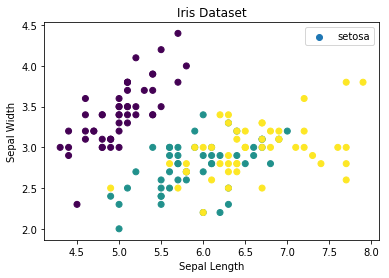

In [3]:
plt.scatter(iris['s_length'], iris['s_width'], c=iris['tipo_num']) # Ploteamos los datos en un scatterplot
plt.xlabel('Sepal Length') # Cambiamos el nombre del eje X
plt.ylabel('Sepal Width') # Cambiamos el nombre del eje Y
plt.title('Iris Dataset') # Cambiamos el nombre del gráfico
plt.legend(('setosa', 'versicolor', 'virginica'))
plt.show() # Mostramos el gráfico

En matplotlib también hay otros tipos de gráficos, como barplots.

En el siguiente ejemplo usaremos un barplot para graficar las estadísticas medias de los 3 tipos de flores

In [4]:
means = iris.groupby('tipo').sum()/50
sl = tuple(means['s_length'])
sw = tuple(means['s_width'])
pl = tuple(means['p_length'])
pw = tuple(means['p_width'])

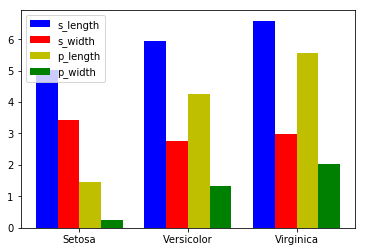

In [5]:
fig, ax = plt.subplots() # Creo subplots

index = np.arange(3) # Creo un array de 0 a 2, esto es para poner los nombres a cada tipo de flor

bar_width = 0.2  # Ancho de barra, si es muy grande pueden superponerse

rects1 = ax.bar(index, sl, bar_width,
                color='b', label='s_length')  # Primera barra

rects2 = ax.bar(index + bar_width, sw, bar_width,
                color='r', label='s_width')

rects3 = ax.bar(index + 2 * bar_width, pl, bar_width,
                color='y', label='p_length')

rects4 = ax.bar(index + 3 * bar_width, pw, bar_width,
                color='g', label='p_width')

ax.set_xticks(index + 3 * bar_width / 2)
ax.set_xticklabels(('Setosa', 'Versicolor', 'Virginica'))
ax.legend(loc=0)  # Poner la leyenda de colores en la mejor posición
plt.show()

## 2. Altair
Altair es una librería de ploteo que ofrece muy buenas funcionalidades, como interactividad, gráficos mas bonitos y facilidad para explortar gráficos a imágenes.
Para correr altair en un jupyter notebook, son necesarias dependencias extras.
```bash
pip install -U altair vega_datasets notebook vega
```
(Si ya tienes jupyter notebook abierto, deberás cerrarlo completamente y volver a abrirlo para que resulte)

Además de esto, es necesario permitir que altair renderize, para esto **siempre** debemos ingresar
```python
alt.renderers.enable('notebook')
```
Si, a pesar de hacer todo esto, jupyter sigue sin funcionar, puedes usar esta librería en conjunto con [Google Colaboratory](https://colab.research.google.com/).

Para los siguientes ejemplos usaremos el mismo dataset, sin embargo esta vez lo importaremos de **vega_datasets** (el resultado es el mismo DataFrame anterior, sin emabrgo este viene automático)

In [6]:
import altair as alt
from vega_datasets import data

# Para notebooks
alt.renderers.enable('notebook')
print()

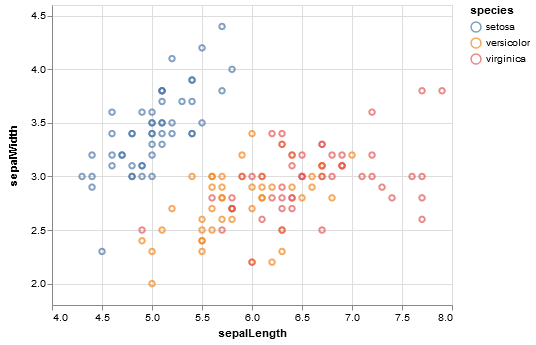

In [7]:
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)), 
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    # Estas opciones son para que el gráfico empiece mas cerca de los datos
    # x='petalLength',
    # y='petalWidth',
    # Estas opciones tambien funcionan, pero no se ven tan bien
    color='species'
)

Podemos agregar mas opciones, como por ejemplo que cada punto sea de tamaño proporcional al tamaño de pétalo de la flor correspondiente

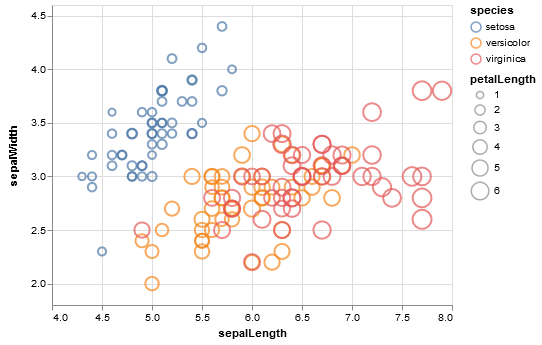

In [8]:
alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)), 
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalLength'
    # size='petalWidth'
    # size='sepalLength'
    # size='sepalWidth'
)

Podemos hacer que el gráfico sea interactivo

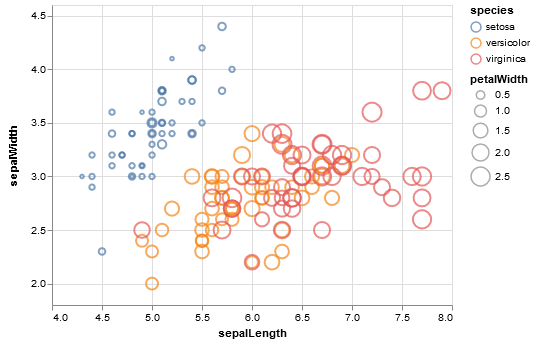

In [9]:
alt.Chart(iris).mark_point().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)), 
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    # size='petalLength'
    size='petalWidth'
    # size='sepalLength'
    # size='sepalWidth'
).interactive()

Los bar charts se hacen muy sencillamente

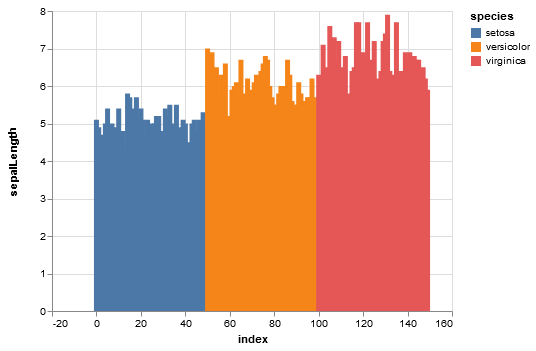

In [10]:
alt.Chart(iris.reset_index()).mark_bar().encode(
    alt.X('index', scale=alt.Scale(zero=False)),
    alt.Y('sepalLength'),
    color='species'
).interactive(bind_y=False)

Finalmente, tambien podemos graficar líneas como funciones

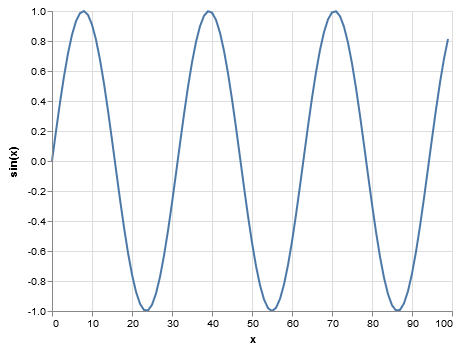

In [11]:
x = np.arange(100)
data = pd.DataFrame({'x': x,
                     'sin(x)': np.sin(x / 5),
                     'cos(x)': np.cos(x / 5),
                     'xd(x)': (np.cos(x / 5) + np.sin(x / 5))/2})
alt.Chart(data).mark_line().encode(
    x='x',
    y='sin(x)'
)

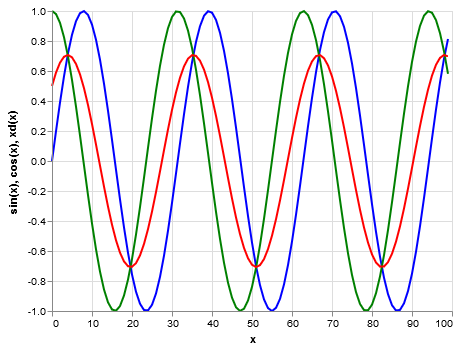

In [12]:
sin = alt.Chart(data).mark_line().encode(
    x='x',
    y='sin(x)',
    color=alt.value('blue'))

cos = alt.Chart(data).mark_line().encode(
    x='x',
    y='cos(x)',
    color=alt.value('green'))

xd = alt.Chart(data).mark_line().encode(
    x='x',
    y='xd(x)',
    color=alt.value('red'))

sin + cos + xd